In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# CS 5635

## Assignment 01 - Plotting and Graphing

In this assignment different plotting and graphing excercises will be shown.

### @author  Scott Merkley
### @version 20230124

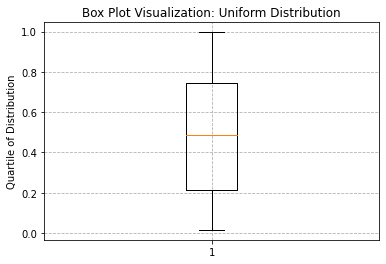

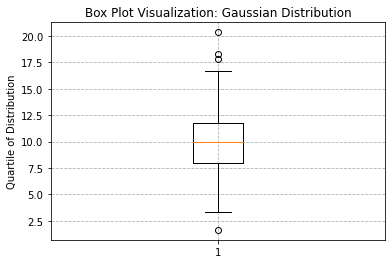

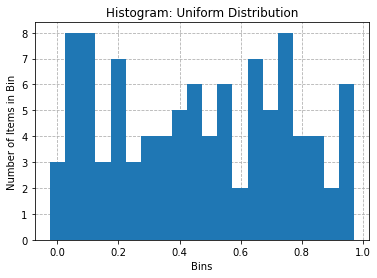

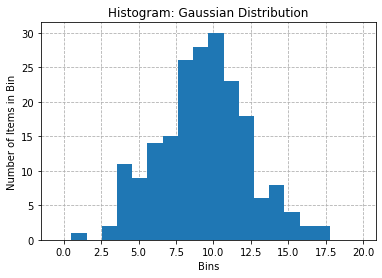

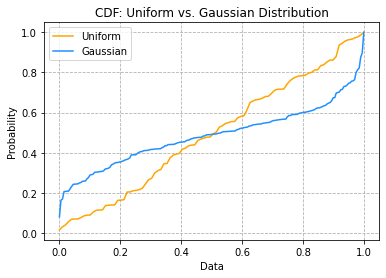

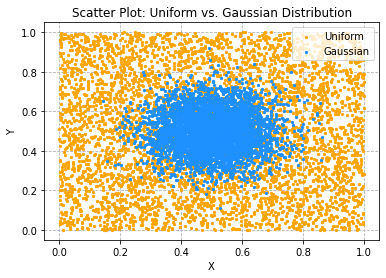

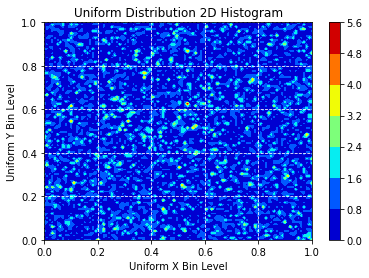

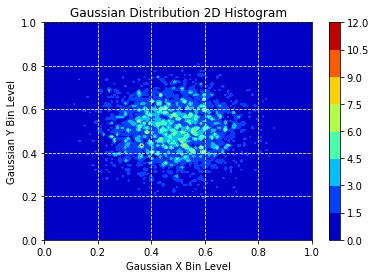

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from array import array
import matplotlib.cm as cm


####################################################
#                                                  #
#                      Part 1                      #
#                                                  #
####################################################



# Creat an array of 100 random numbers uniformly distributed between [0, 1]
uniformArray = rnd.uniform( 0, 1, 100 )

# Create a second array of 200 random numbers with Gaussian Distribution between [1, 100]
gaussianMean = 10
gaussianArray = rnd.normal( gaussianMean, np.sqrt( gaussianMean ), 200 )

# Creat a box plot for visualization of both arrays
plt.title( "Box Plot Visualization: Uniform Distribution" )
plt.xlabel( "" )
plt.ylabel( "Quartile of Distribution" )
plt.boxplot( uniformArray )
plt.grid( linestyle = '--' )
plt.show()

plt.title( "Box Plot Visualization: Gaussian Distribution" )
plt.xlabel( "" )
plt.ylabel( "Quartile of Distribution" )
plt.boxplot( gaussianArray )
plt.grid( linestyle = '--' )
plt.show()

# Partition the data into 20 bins without using any library and create a histogram of both arrays using the 20 bins with a bar chart

# PlotHistogram is a function that takes in an array to be made into a histogram the number of bins
# for the histogram while creating and plots a histogram array with the number of bins. This 
# function also takes in a plot title.
#
# @param arr            - an array to be made into a histogram
# @param numberOfBins   - number of bins for the array
# @param title          - title for the histogram
def PlotHistogram (arr, numberOfBins, title):
    histArray = np.zeros(numberOfBins)
    histIndices = np.zeros(numberOfBins)
    for i in range(1, len(histArray) + 1):
        lowerLimit = (i - 1) / len(histArray) * max(arr)
        upperLimit = i / len(histArray) * max(arr)
        histIndices[i - 1] = lowerLimit
        for data in arr:
            if data > lowerLimit and data < upperLimit:
                histArray[i - 1] += 1

    # Want to find out how to set the ranges of a histogram better. <=? <?
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('Number of Items in Bin')
    plt.bar(histIndices, histArray, width = 0.05 * max(arr), zorder = 5)
    plt.grid(linestyle = '--', zorder = 0)
    plt.show()


PlotHistogram( uniformArray, 20, 'Histogram: Uniform Distribution' )
PlotHistogram( gaussianArray, 20, 'Histogram: Gaussian Distribution' )


# Write the arrays to a binary file, read it back into an array, then plot the cumulative distribution function using a line graph

# ArrayToBinary takes an input array and a file name and converts the given array to a binary file.
#
# @param arr - array to convert to binary file
# @fileName  - name of file
def ArrayToBinary(_arr, _fileName):
    outputFile = open(_fileName, 'wb')
    _arr.tofile(outputFile)
    outputFile.close()

# BinaryToArray takes a file name reading the file and returning an array.
#
# @fileName - name of file
# return    - array from file
def BinaryToArray(_fileName):
    inputFile = open(_fileName, 'rb')
    arr = array('d')
    arr.frombytes(inputFile.read())
    arr = np.array(arr)
    return arr

ArrayToBinary(uniformArray, 'uniformArray')
ArrayToBinary(gaussianArray, 'gaussianArray')

uniformArray = BinaryToArray('uniformArray')
gaussianArray = BinaryToArray('gaussianArray')

plt.title( "CDF: Uniform vs. Gaussian Distribution" )
plt.xlabel('Data')
plt.ylabel('Probability')
plt.plot(np.arange(len(uniformArray)) / (len(uniformArray) - 1), np.sort(uniformArray) / max(uniformArray), zorder = 5, label = 'Uniform', c = 'orange')
plt.plot(np.arange(len(gaussianArray)) / (len(gaussianArray) - 1), np.sort(gaussianArray) / max(gaussianArray), zorder = 5, label = 'Gaussian', c = 'dodgerblue')
plt.grid(linestyle = '--', zorder = 0)
plt.legend()
plt.show()



# Create 2D arrays using random sampling and gaussian random sampling with 5,000 points
uniform2D = rnd.sample((2, 5000))
mean = 0.5
gaussian2D = rnd.normal(mean, 0.1, (2, 5000))
plt.title('Scatter Plot: Uniform vs. Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(uniform2D[0], uniform2D[1], c = 'orange', zorder = 5, s = 5, label = 'Uniform')
plt.scatter( gaussian2D[0], gaussian2D[1], zorder = 5, s = 5, c = 'dodgerblue', label = 'Gaussian' ) #, c = (np.cos(gaussian2D[0] - mean)**2 - np.sin(gaussian2D[1] - mean)**2) )
plt.grid( linestyle = '--', zorder = 0 )
plt.legend(loc = 'upper right')
plt.show()


# For both sampling arrays , generate 100 bins along both dimensions

# MakeHistogram is a function that takes in an array to be made into a histogram the number of bins
# for the histogram while creating and plots a histogram array with the number of bins.
#
# @param arr            - an array to be made into a histogram
# @param numberOfBins   - number of bins for the array
# @return               - an array with the histogram of the given array
def MakeHistogram (arr, numberOfBins):
    histArray = np.zeros(numberOfBins)
    histIndices = np.zeros(numberOfBins)
    for i in range(1, len(histArray) + 1):
        lowerLimit = (i - 1) / len(histArray) * max(arr)
        upperLimit = i / len(histArray) * max(arr)
        histIndices[i - 1] = lowerLimit
        for data in arr:
            if data > lowerLimit and data < upperLimit:
                histArray[i - 1] += 1

    return np.array([histArray, histIndices])


low = 0
high = 1
numberOfPoints = 5000
counts, xBins, yBins = np.histogram2d( rnd.uniform( low, high, numberOfPoints ), rnd.uniform( low, high, numberOfPoints ), bins = 100 )
plt.contourf( counts, extent = [0, 1, 0, 1], zorder = -1 , cmap = cm.jet )
plt.title( 'Uniform Distribution 2D Histogram' )
plt.grid( color = 'w', linestyle = '--', zorder = 0 )
plt.xlabel( 'Uniform X Bin Level' )
plt.ylabel( 'Uniform Y Bin Level' )
plt.colorbar()
plt.show()

mean = 0.5
spread = 0.5
counts, xBins, yBins = np.histogram2d( rnd.normal( mean, spread, numberOfPoints ), rnd.normal( mean, spread, numberOfPoints ), bins = 100 )
plt.contourf( counts, extent = [0, 1, 0, 1], zorder = -1 , cmap = cm.jet )
plt.title( 'Gaussian Distribution 2D Histogram' )
plt.grid( color = 'w', linestyle = '--', zorder = 0 )
plt.xlabel( 'Gaussian X Bin Level' )
plt.ylabel( 'Gaussian Y Bin Level' )
plt.colorbar()
plt.show()

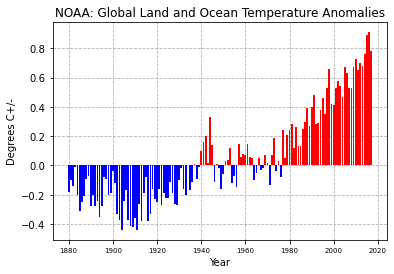

<ipython-input-229-9fb068b222f1>:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



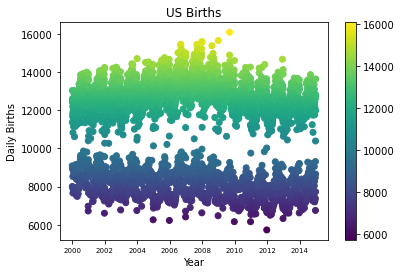

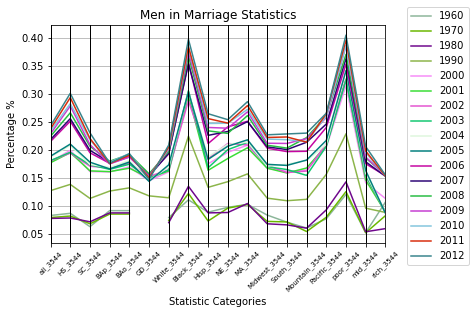

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from array import array
import matplotlib.cm as cm
import pandas as pd
import plotly.express as pltex
import plotly.graph_objects as pltgo


####################################################
#                                                  #
#                      Part 2                      #
#                                                  #
####################################################


# 1 - Creat a box plot for visualization of NOAA Temperatures
tempsNOAA = pd.read_csv('NOAA-Temperatures.csv', header = 4)
plt.bar(np.asarray(tempsNOAA['Year'], int), tempsNOAA['Value'], color = (tempsNOAA['Value'] > 0).map({True: 'r', False: 'b'}), zorder = 5)
plt.title("NOAA: Global Land and Ocean Temperature Anomalies")
plt.xlabel('Year')
plt.ylabel("Degrees C+/-")
plt.grid(linestyle = '--', zorder = 0)
plt.show()

# The data seems to be trending to hotter temperatures ever since the later 1970's. The data
# also seems to have a colder trend from the 1880's until about 1920 where it started to get
# warmer.



# 2 - Generate a Radar Chart with 8 Nutritional Statistics for 3 Cereals
breakfastCereals = pd.read_excel('Breakfast-Cereals.xls', header = 0)
cerealNames = ['Cinnamon Toast Crunch', 'Trix', 'Cheerios'] # breakfastCereals['Cereal']
categories = ['Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbohydrates', 'Sugars', 'Potassium']
fig = pltgo.Figure()
for cereal in cerealNames:  
    fig.add_trace(pltgo.Scatterpolar(r = breakfastCereals.iloc[np.where(breakfastCereals['Cereal'] == cereal)][categories].to_numpy()[0], theta = categories, fill = 'toself', name = cereal))
fig.update_layout(title = 'Cereal Nutritional Information')
# fig.show()



# 3 - Choose two different data sets to visualize from https://github.com/fivethirtyeight/data. Choose between Parallel Coordinates and Scatter Plot
filename = "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv"
# filename = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
# filename = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/fifa/fifa_countries_audience.csv'
data = pd.read_csv(filename)
data['date'] = data['year'].apply(str) + '/' + data['month'].apply(str) + '/' + data['date_of_month'].apply(str)
data['date'] = pd.to_datetime(data['date'])
data['total_growth'] = data['births']
for i in range(1, len(data['births'])):
    data['total_growth'][i] = data['births'][i] + data['total_growth'][i - 1]
# data.plot.scatter(x = 'date', y = 'births', c = 'births', colormap = 'viridis')
plt.scatter(data['date'], data['births'], c = data['births'])
plt.title('US Births')
plt.xlabel('Year')
plt.ylabel('Daily Births')
plt.colorbar()
plt.show()


filename = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/men.csv'
data = pd.read_csv(filename)
data = data.drop('date', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)
columns3544 = [col for col in data.columns if '3544' in col]
columns3544.append('year')
data = data[columns3544]
pd.plotting.parallel_coordinates(data, 'year').legend(loc='center left',bbox_to_anchor=(1.05, 0.49))
plt.title('Men in Marriage Statistics')
plt.ylabel('Percentage %')
plt.xlabel('Statistic Categories')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
'''
####################################################
#                                                  #
#                      Part 3                      #
#                                                  #
####################################################

1) Why is assessing value of visualizations important? What are two measures for deciding the value of visualization?

    The assessment value of visualizations is important to estimate the amount of time saved, and 
    amount of effort in finding the desired information in any visualization process.

    a. Effectiveness
    b. Efficiency

2) Briefly describe a mathematical model for the visualization block shown in Fig. 1.

    Figure one uses boxes and circles to show processes of transformation from inputs to outputs.

3) State four parameters that decribe the costs associated with any visualization technique.

    a. Number of Users (n)
    b. Frequency of Use (m)
    c. The use of texture based visualizations
    d. Straightforward cross-sections

4) What are the pros and cons of interactivity of visualizations?

    Pros:

    Cons:
        - Allowing users to modify S freely will lead to subjectiveness
        - It is tempting to tune the mapping so that the desired result comes out strongly, but 
          can be misleading.

'''